## Setup

In [6]:
using LightXML
using Plots
using Revise
using LatLon

### Application of LatLon Package to the Study of 2023/2024 Solar Eclipse Data in the US

#### Get the lat/lon coordinates of the Center of the Oct 2023 and Apr 2024 Eclipses in the US.

In [7]:
proj_path = dirname(pathof(LatLon))
c23 = center_latlon_from_NASA_xml_file(joinpath(proj_path, "../data/2023/center.kml"))
c24 = center_latlon_from_NASA_xml_file(joinpath(proj_path, "../data/2024/center.kml"))

2×6770 Matrix{Float64}:
 -109.972  -109.967   -109.963   -109.958   …  -47.2747  -47.239   -47.2031
   19.013    19.0179    19.0227    19.0276      48.9999   49.0014   49.0029

#### Compute the Distance between the Two Eclipses
Essentially, find the intersection point.

In [8]:
d, imin, jmin = latlon_set_dist(c23, c24)
println("Distance between the two sets is: $d kilometers.")
println("The distance in feet is: $(Int64(round(geo_dist(c23[:, 2350], c24[:, 2260]) * 5280 * 0.62137, digits=0))) feet.")
println("Index in the c23 data set of the intersection is: $imin")
println("Index in the c24 data set of the intersection is: $jmin")

Distance between the two sets is: 0.3129388272305813 kilometers.
The distance in feet is: 1027 feet.
Index in the c23 data set of the intersection is: 2350
Index in the c24 data set of the intersection is: 2260


#### The lat/lon of Rockwall, Texas.

In [9]:
rw_lon = -96.458649
rw_lat =  32.931049;

#### Find the distance between Rockwall (in kilometers) and the intersection point of the two eclipses.

In [10]:
rw_dist_to_intersection = geo_dist([rw_lon, rw_lat], c23[:, 2350])
println("Distance from Rockwall, Texas to intersection point: $(Int64(round(rw_dist_to_intersection, digits=0))) kilometers.")
println("The distance in miles is: $(Int64(round(rw_dist_to_intersection * 0.62137, digits=0))) miles.") 

Distance from Rockwall, Texas to intersection point: 458 kilometers.
The distance in miles is: 285 miles.


#### Plot the Eclipse Data

In [13]:
# Intersection point
cx, cy = c23[:, 2350]

2-element Vector{Float64}:
 -99.57277
  29.78056

In [14]:
# Lon and Lat of the 2023 center path data.
lon23 = c23[1, :]
lat23 = c23[2, :]

# Lon and Lat of the 2024 center path data.
lon24 = c24[1, :]
lat24 = c24[2, :];

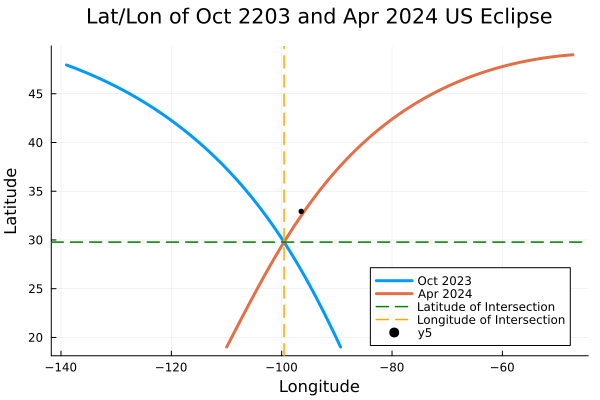

In [15]:
plot(lon23, lat23, title = "Lat/Lon of Oct 2203 and Apr 2024 US Eclipse\n", label="Oct 2023", lw=3)
plot!(xlabel="Longitude", ylabel="Latitude", legend=:bottomright)
plot!(lon24, lat24, linewidth=3, label="Apr 2024", lw=3)
hline!([cy], label="Latitude of Intersection", lw=1.5, ls=:dash, lc=:green)
vline!([cx], label="Longitude of Intersection", lw=1.5, ls=:dash, lc=:orange)
scatter!([rw_lon], [rw_lat], ms=3, mc=:black)

#### Get the Annuli Representing the "Total" Swath of the Eclipse Path for the 2023 and 2024 US Eclipses.

In [16]:
## Oct 2023 Eclipse
proj_path=dirname(pathof(LatLon))
mat_hi_23 = upath_latlon_from_NASA_xml_file(joinpath(proj_path, "../data/2023/upath_hi.kml"))
mat_lo_23 = upath_latlon_from_NASA_xml_file(joinpath(proj_path, "../data/2023/upath_lo.kml"))

## Apr 2024 Eclipse
mat_hi_24 = upath_latlon_from_NASA_xml_file(joinpath(proj_path, "../data/2024/upath_hi.kml"))
mat_lo_24 = upath_latlon_from_NASA_xml_file(joinpath(proj_path, "../data/2024/upath_lo.kml"))

2×8902 Matrix{Float64}:
 -44.6265  -44.5825  -44.5386  -44.4946  …  -44.7112  -44.6704  -44.6265
  49.8164   49.818    49.8193   49.8204      49.812    49.8143   49.8164

#### Plot the Annuli

In [ ]:
scatter(mat_lo_23[1,:], mat_lo_23[2,:], ms=1)
scatter!(mat_lo_24[1,:], mat_lo_24[2,:], ms=1)

In [ ]:
# Run this cell unless you have the webio-jupyterlab-provider extension installed and enabled.
# plotlyjs()

#### Plot the Intersection of the Centers of the Eclipse Paths along with more Focused Annular Regions
Also, plot Rockwall, Texas's lat/lon.

In [ ]:
plot(lon23, lat23, title = "Lat/Lon of Oct 2023 and Apr 2024 US Eclipses\n", label="Oct 2023 Center", lw=1.5, lc=:blue)
plot!(xlabel="Longitude", ylabel="Latitude", legend=:bottomright)
plot!(lon24, lat24, label="Apr 2024 Center", lw=1.5, lc=:red)
hline!([cy], label="Latitude of Intersection", lw=1.5, ls=:dash, lc=:grey)
vline!([cx], label="Longitude of Intersection", lw=1.5, ls=:dash, lc=:grey)
plot!(mat_hi_23[1, :], mat_hi_23[2, :], ms=1, color=:blue, label="Oct 2023: Total Eclipse Path")
plot!(mat_hi_24[1, :], mat_hi_24[2, :], ms=1, color=:red, label="Apr 2024: Total Eclipse Path")
scatter!([rw_lon], [rw_lat], ms=3, mc=:yellow, label="Rockwall, Texas")

#### Intersection Points of the Annular Rings (Representing the total eclipse swaths)

In [ ]:
_, N23 = size(mat_hi_23)
_, N24 = size(mat_hi_24)
N23_2 = div(N23, 2)
N24_2 = div(N24, 2);

In [ ]:
d, imin11, jmin11 = latlon_set_dist(mat_hi_23[:, 1:N23_2], mat_hi_24[:, 1:N24_2])

In [ ]:
d, imin12, jmin12 = latlon_set_dist(mat_hi_23[:, 1:N23_2], mat_hi_24[:, N24_2:end])
jmin12 += N24_2 - 1
d, imin12, jmin12

In [ ]:
d, imin21, jmin21 = latlon_set_dist(mat_hi_23[:, N23_2:end], mat_hi_24[:, 1:N24_2])
imin21 += N23_2 - 1
d, imin21, jmin21

In [ ]:
d, imin22, jmin22 = latlon_set_dist(mat_hi_23[:, N23_2:end], mat_hi_24[:, N24_2:end])
imin22 += N23_2 - 1
jmin22 += N24_2 - 1
d, imin22, jmin22

In [ ]:
mat_hi_23[:, imin11]

In [ ]:
mat_hi_23[:, imin21]

In [ ]:
plot(mat_hi_23[1, 1:N23_2], mat_hi_23[2, 1:N23_2], ms=2, color=:blue, title="East Point") 
plot!(mat_hi_24[1, 1:N24_2], mat_hi_24[2, 1:N24_2], ms=2, color=:red)

In [ ]:
mat_hi_23[:, imin11]

In [ ]:
plot(mat_hi_23[1, 1:N23_2], mat_hi_23[2, 1:N23_2], ms=2, color=:blue, title="North Point") 
plot!(mat_hi_24[1, N24_2:end], mat_hi_24[2, N24_2:end], ms=2, color=:red)

In [ ]:
mat_hi_23[:, imin12]

In [ ]:
plot(mat_hi_23[1, N23_2:end], mat_hi_23[2, N23_2:end], ms=2, color=:blue, title="South Point") 
plot!(mat_hi_24[1, 1:N24_2], mat_hi_24[2, 1:N24_2], ms=2, color=:red)

In [ ]:
mat_hi_23[:, imin21]

In [ ]:
plot(mat_hi_23[1, N23_2:end], mat_hi_23[2, N23_2:end], ms=2, color=:blue, title="West Point") 
plot!(mat_hi_24[1, N24_2:end], mat_hi_24[2, N24_2:end], ms=2, color=:red)

In [ ]:
mat_hi_23[:, imin22]

In [ ]:
mat_hi_24[:, jmin22]

### The 4 Corners of the Annular Intersection

#### East Point

In [ ]:
c1 = geo_midpoint(mat_hi_23[:, imin11], mat_hi_24[:, jmin11])

#### West Point

In [ ]:
c4 = geo_midpoint(mat_hi_23[:, imin22], mat_hi_24[:, jmin22])

#### North Point

In [ ]:
c2 = geo_midpoint(mat_hi_23[:, imin12], mat_hi_24[:, jmin12])

#### South Point

In [ ]:
c3 = geo_midpoint(mat_hi_23[:, imin21], mat_hi_24[:, jmin21])